In [10]:
#mengimport library dari python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#mengakses csv menggunakan pandas 
import pandas as pd

suicide_df = pd.read_csv('file:///C:/Users/USER/OneDrive/Documents/master.csv')

print("data teratas dari data suicide:\n", suicide_df.head())

data teratas dari data suicide:
    country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN     2,15,66,24,900   
1               5.19  Albania1987           NaN     2,15,66,24,900   
2               4.83  Albania1987           NaN     2,15,66,24,900   
3               4.59  Albania1987           NaN     2,15,66,24,900   
4               3.28  Albania1987           NaN     2,15,66,24,900   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2               796.0     

In [18]:
#mengecek ukuran data dari kejadian data suicide
print ("ukuran dataset suicide rated overviewed:\n", suicide_df.shape)

#info dari dataset kejadian suicide 
print("info dataset suicide rated overviewed:\n", suicide_df.info())

print(suicide_df.describe())

ukuran dataset suicide rated overviewed:
 (31756, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB
info dataset suicide rated overviewed:
 None
               year   suicides_no    populat

In [19]:
#data cleaning timeeeee

#mengubah kolom tahun menjadi datetime
suicide_df['year'] = pd.to_datetime(suicide_df['year'], format='%Y')

print (suicide_df['year'].dtype)
#informasi dataset setelah mengatur tahun
print(suicide_df.info())

print(suicide_df['year'].tail())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             31756 non-null  object        
 1   year                31756 non-null  datetime64[ns]
 2   sex                 31756 non-null  object        
 3   age                 31756 non-null  object        
 4   suicides_no         30556 non-null  float64       
 5   population          31756 non-null  int64         
 6   suicides/100k pop   31756 non-null  float64       
 7   country-year        31756 non-null  object        
 8   HDI for year        12300 non-null  float64       
 9    gdp_for_year ($)   31756 non-null  object        
 10  gdp_per_capita ($)  31756 non-null  float64       
 11  generation          31756 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 2.9+ MB
None
31751 

In [50]:
#cek missing value dari dataset suicide
print("Jumlah missing value tiap kolom:")
print(suicide_df.isna().sum())
print(suicide_df.isna().sum().sum())

suicide_df.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(suicide_df.isna().sum())

Jumlah missing value tiap kolom:
country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64
20656

Jumlah missing value tiap kolom setelah didrop:
country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [2]:
# Menghitung jumlah bunuh diri dan jumlah populasi per jenis kelamin
gender_counts = suicide_df.groupby('sex')['suicides_no', 'population'].sum()

# Menghitung rasio bunuh diri per 100.000 penduduk per jenis kelamin
gender_counts['suicide_rate'] = gender_counts['suicides_no'] / gender_counts['population'] * 100000

# Menampilkan hasil
print(gender_counts)

C:\Users\USER\AppData\Local\Temp\ipykernel_4308\725509958.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_counts = suicide_df.groupby('sex')['suicides_no', 'population'].sum()


        suicides_no    population  suicide_rate
sex                                            
female    1705078.0  115210441021      1.479968
male      5540857.0  113987035743      4.860954


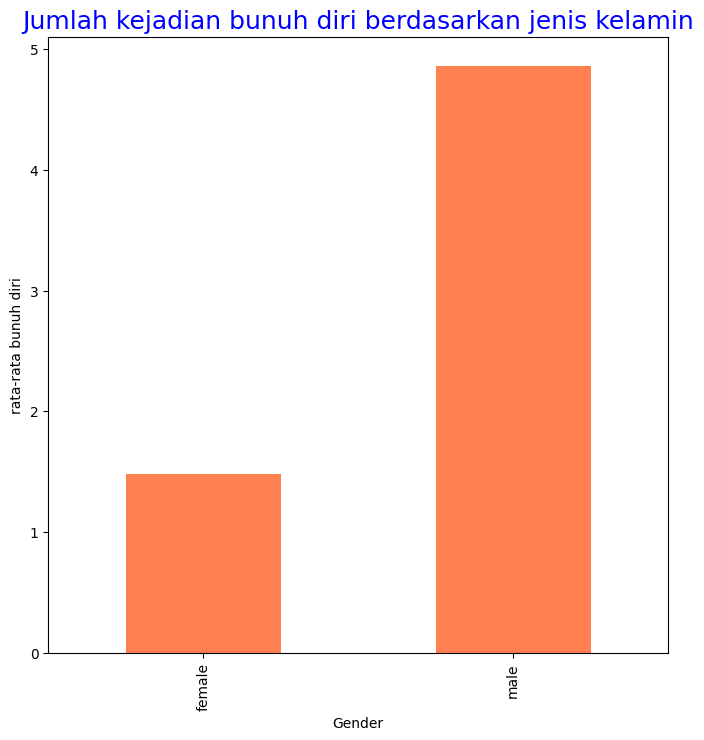

In [14]:
#import matplotlib
import matplotlib.pyplot as plt

#membuat grafik kasus bunuh diri sesuai gender menggunakan plot bar
plt.figure(figsize=(8,8))
gender_counts['suicide_rate'].plot(kind="bar", color="coral")

# Atur label dan judul
plt.title('Jumlah kejadian bunuh diri berdasarkan jenis kelamin', fontsize=18, color="b")
plt.xlabel('Gender')
plt.ylabel('rata-rata bunuh diri')

plt.show()

In [27]:
# Menghitung jumlah bunuh diri dan jumlah populasi per jenis kelamin
suicide_by_country = suicide_df.groupby('country')['suicides_no'].sum()

country_counts = suicide_by_country.sort_values(ascending=False).head(10)
# Menampilkan hasil
print(country_counts)

country
Russian Federation    1241820.0
United States         1034013.0
Japan                  846698.0
Ukraine                338253.0
France                 329127.0
Germany                322286.0
Republic of Korea      291207.0
Brazil                 255979.0
Poland                 153526.0
United Kingdom         152238.0
Name: suicides_no, dtype: float64


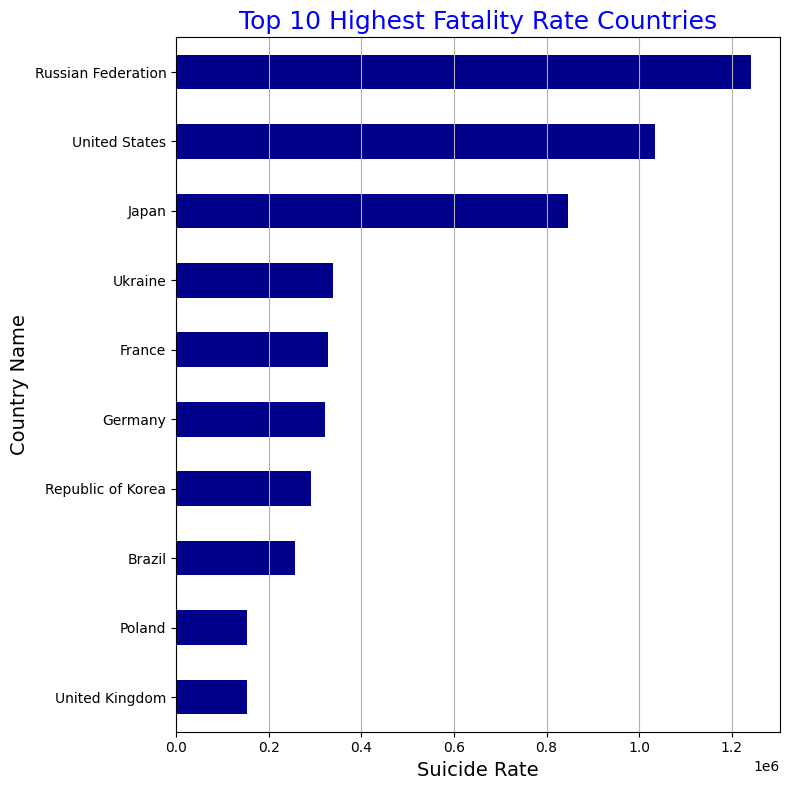

In [32]:
# Visulisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
country_counts.sort_values().plot(kind="barh", color="darkblue")
plt.title("Top 10 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Suicide Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7940\3796982669.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  generation_counts = suicide_df.groupby('generation', as_index=True)['suicides_no','population'].sum()


generation
Boomers            0.000055
G.I. Generation    0.000011
Generation X       0.000022
Generation Z       0.000006
Millenials         0.000059
Silent             0.000050
Name: suicide_rate, dtype: float64


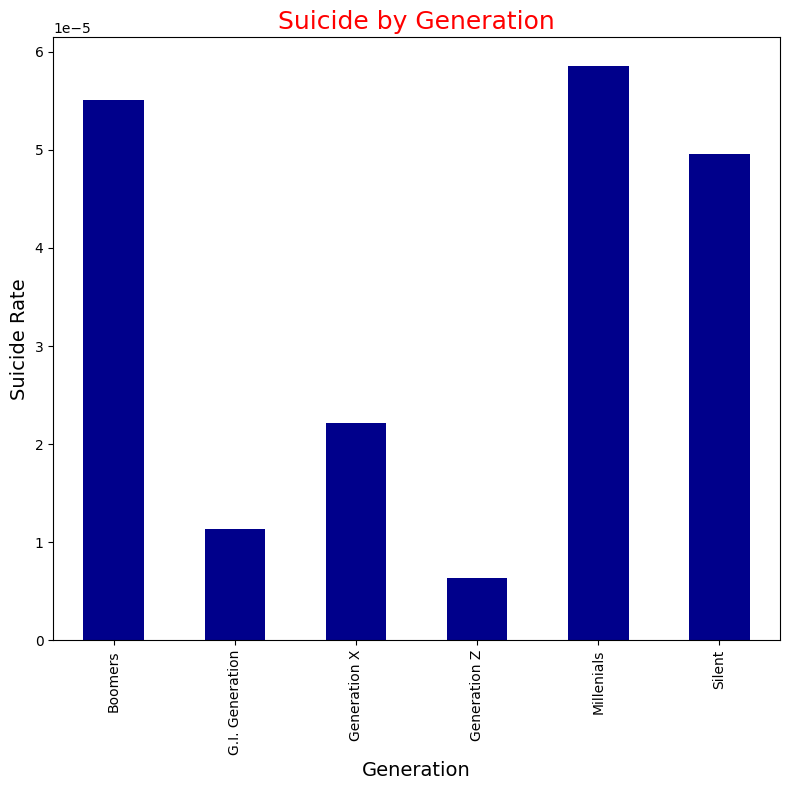

In [30]:
# Menghitung jumlah bunuh diri dan jumlah populasi sesuai generasi
generation_counts = suicide_df.groupby('generation', as_index=True)['suicides_no','population'].sum()

# Menghitung rasio bunuh diri per 100.000 penduduk per jenis kelamin
generation_counts['suicide_rate'] = generation_counts['suicides_no'] / generation_counts['population'] 

print(generation_counts['suicide_rate'])

# Visulisasi
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
generation_counts['suicide_rate'].plot(kind="bar", color="darkblue")
plt.title("Suicide by Generation", fontsize=18, color="r")
plt.xlabel("Generation", fontsize=14)
plt.ylabel("Suicide Rate", fontsize=14)
plt.tight_layout()
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_7940\4287809274.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = suicide_df.groupby(['year']).sum()


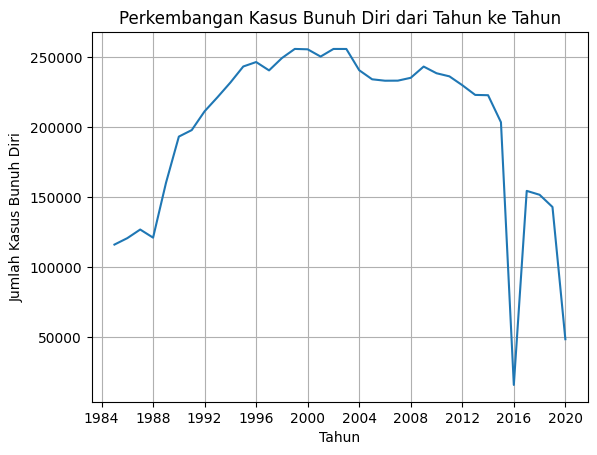

In [34]:
# kelompokkan data berdasarkan tahun
grouped = suicide_df.groupby(['year']).sum()

# hitung jumlah kasus bunuh diri untuk setiap tahun
suicides = grouped['suicides_no']

# buat grafik
plt.plot(suicides.index, suicides.values)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Bunuh Diri')
plt.title('Perkembangan Kasus Bunuh Diri dari Tahun ke Tahun')
plt.grid('x')
plt.show()